# Comparación iespnet contra dsf-iespnet

In [1]:
import sys
import os

import pandas   as pd
import numpy    as np
import seaborn  as sns

import matplotlib.pyplot        as plt
import matplotlib.font_manager  as fm
import utilit_espectrograms as ue

from matplotlib.lines     import Line2D
from utilit_espectrograms import get_bool_mask_stim_artifact
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
spe_dir_dsf_iespnet = '/media/martin/Disco2/Rns_Data/PITT_PI_EEG/'
spe_dir_iespnet     = '/media/martin/Disco2/Rns_Data/PITT_PI_SPEC/'

In [3]:
meta_data_dsf_iespnet = '/media/martin/Disco2/Rns_Data/PITT_PI_EEG/METADATA/allfiles_metadata.csv' 
meta_data_iespnet     = '/media/martin/Disco2/Rns_Data/PITT_PI_SPEC/METADATA/allfiles_metadata.csv'

df_meta_dsf_iespnet   = pd.read_csv(meta_data_dsf_iespnet)
df_meta_iespnet       = pd.read_csv(meta_data_iespnet)

In [4]:
patients_dsf_iespnet  = df_meta_dsf_iespnet['rns_id'].unique().tolist()
save_path_dsf_iespnet = '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo'

patients_iespnet      = df_meta_iespnet['rns_id'].unique().tolist()
save_path_iespnet     = '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo'

In [6]:
# save results
save_results_dsf_iespnet = []
for s in range(len(patients_dsf_iespnet)):
    save_results_dsf_iespnet.append(save_path_dsf_iespnet + '/' + patients_dsf_iespnet[s] + '/results/' + 'results.npy')

save_results_iespnet = []
for s in range(len(patients_iespnet)):
    save_results_iespnet.append(save_path_iespnet + '/' + patients_iespnet[s] + '/results/' + 'results.npy')

In [7]:
results_dsf_iespnet = []
for s in range(len(save_results_dsf_iespnet)):
    results_dsf_iespnet.append(np.load(save_results_dsf_iespnet[s],allow_pickle=True).item())

results_iespnet=[]
for s in range(len(save_results_iespnet)):
    results_iespnet.append(np.load(save_results_iespnet[s],allow_pickle=True).item())

In [8]:
prediction_te_dsf_iespnet = []
for s in range (len(results_dsf_iespnet)):
    prediction_te_dsf_iespnet.append(results_dsf_iespnet[s].get('prediction_te'))

prediction_te_iespnet = []
for s in range (len(results_iespnet)):
    prediction_te_iespnet.append(results_iespnet[s].get('prediction_te'))

In [9]:
accuracy_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    accuracy_dsf_iespnet.append(float(prediction_te_dsf_iespnet[s].get('accuracy')))
    
f1_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    f1_dsf_iespnet.append(float(prediction_te_dsf_iespnet[s].get('f1')))

MAE_time_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    MAE_time_dsf_iespnet.append(float(prediction_te_dsf_iespnet[s].get('MAE_time')))

In [10]:
accuracy_iespnet = []
for s in range (len(prediction_te_iespnet)):
    accuracy_iespnet.append(float(prediction_te_iespnet[s].get('accuracy')))
    
f1_iespnet = []
for s in range (len(prediction_te_iespnet)):
    f1_iespnet.append(float(prediction_te_iespnet[s].get('f1')))

MAE_time_iespnet = []
for s in range (len(prediction_te_iespnet)):
    MAE_time_iespnet.append(float(prediction_te_iespnet[s].get('MAE_time')))

In [19]:
listas = np.load('data_lists.npy',allow_pickle=True).item()
listas.keys()

dict_keys(['short_file_per_epoch_per_patient', 'time_stim_per_epoch_per_patient', 'time_to_pad_per_epoch_per_patient', 'patients_list'])

In [20]:
time_stim_per_epoch_per_patient = listas.get('time_stim_per_epoch_per_patient')
len(time_stim_per_epoch_per_patient)

30

In [21]:
time_to_pad_per_epoch_per_patient = listas.get('time_to_pad_per_epoch_per_patient')
len(time_to_pad_per_epoch_per_patient)

30

In [22]:
short_file_per_epoch_per_patient = listas.get('short_file_per_epoch_per_patient')
len(short_file_per_epoch_per_patient)

30

In [15]:
time_stim_prome_epoch = []
for s in range(len(time_stim_per_epoch_per_patient)):
    time_stim_prome_epoch.append(np.mean(np.nan_to_num(time_stim_per_epoch_per_patient[s])))

In [16]:
time_to_pad_prom_epoch = []
for s in range(len(time_to_pad_per_epoch_per_patient)):
    time_to_pad_prom_epoch.append(np.mean(np.nan_to_num(time_to_pad_per_epoch_per_patient[s])))

In [17]:
short_file_prom_epoch = []
for s in range(len(short_file_per_epoch_per_patient)):
    short_file_prom_epoch.append(np.mean(np.nan_to_num(short_file_per_epoch_per_patient[s])))

In [18]:
variable_relativa_f1       = (np.array(f1_dsf_iespnet)-np.array(f1_iespnet))/np.array(f1_iespnet)
variable_relativa_accuracy = (np.array(accuracy_dsf_iespnet)-np.array(accuracy_iespnet))/np.array(accuracy_iespnet)

In [19]:
df_resultados = pd.DataFrame({
                              'Pacientes'              : patients_dsf_iespnet,
                              'Balanced Accuracy'      : accuracy_dsf_iespnet, 
                              'F1'                     : f1_iespnet, 
                              'Tiempo Estimulación'    : time_stim_prome_epoch,
                              'Tiempo Z-Padding'       : time_to_pad_prom_epoch,
                              #'Registos_cortos'         : short_file_prom_epoch,
                              'F1 Relativa'            : variable_relativa_f1,
                              'B Accuracy Relativa'    : variable_relativa_accuracy
                            })
df_resultados

,Pacientes,Balanced Accuracy,F1,Tiempo Estimulación,Tiempo Z-Padding,F1 Relativa,B Accuracy Relativa
0,PIT-RNS1603,0.877947,0.806252,3.098563,4.000187,0.029219,0.107372
1,PIT-RNS6989,0.971544,0.870045,3.029595,7.959445,0.039601,0.025890
2,PIT-RNS3016,0.676442,0.659410,4.547820,14.810537,-0.100081,0.006654
3,PIT-RNS1529,0.904922,0.932166,3.113134,3.235294,-0.039936,-0.022310
4,PIT-RNS7168,0.649294,0.618873,4.384633,5.056571,0.104260,0.112939
5,PIT-RNS4098,0.513172,0.427625,2.150267,23.084517,0.248234,0.063281
6,PIT-RNS1836,0.625729,0.650445,3.106215,9.107780,0.025498,-0.002098
7,PIT-RNS9183,0.891573,0.914993,3.015319,5.713600,-0.028442,-0.023537
8,PIT-RNS1440,0.979252,0.979601,4.070131,6.718762,-0.015246,0.005396
9,PIT-RNS1713,0.795788,0.730827,9.992515,9.946556,0.012288,0.124191


In [20]:
print(
      patients_iespnet.index('PIT-RNS0427'),
      patients_iespnet.index('PIT-RNS1713'),  
      patients_iespnet.index('PIT-RNS3016'),
      patients_iespnet.index('PIT-RNS7168'),
      patients_iespnet.index('PIT-RNS8326'),
      patients_iespnet.index('PIT-RNS6762'),
     )

28 9 2 4 18 25


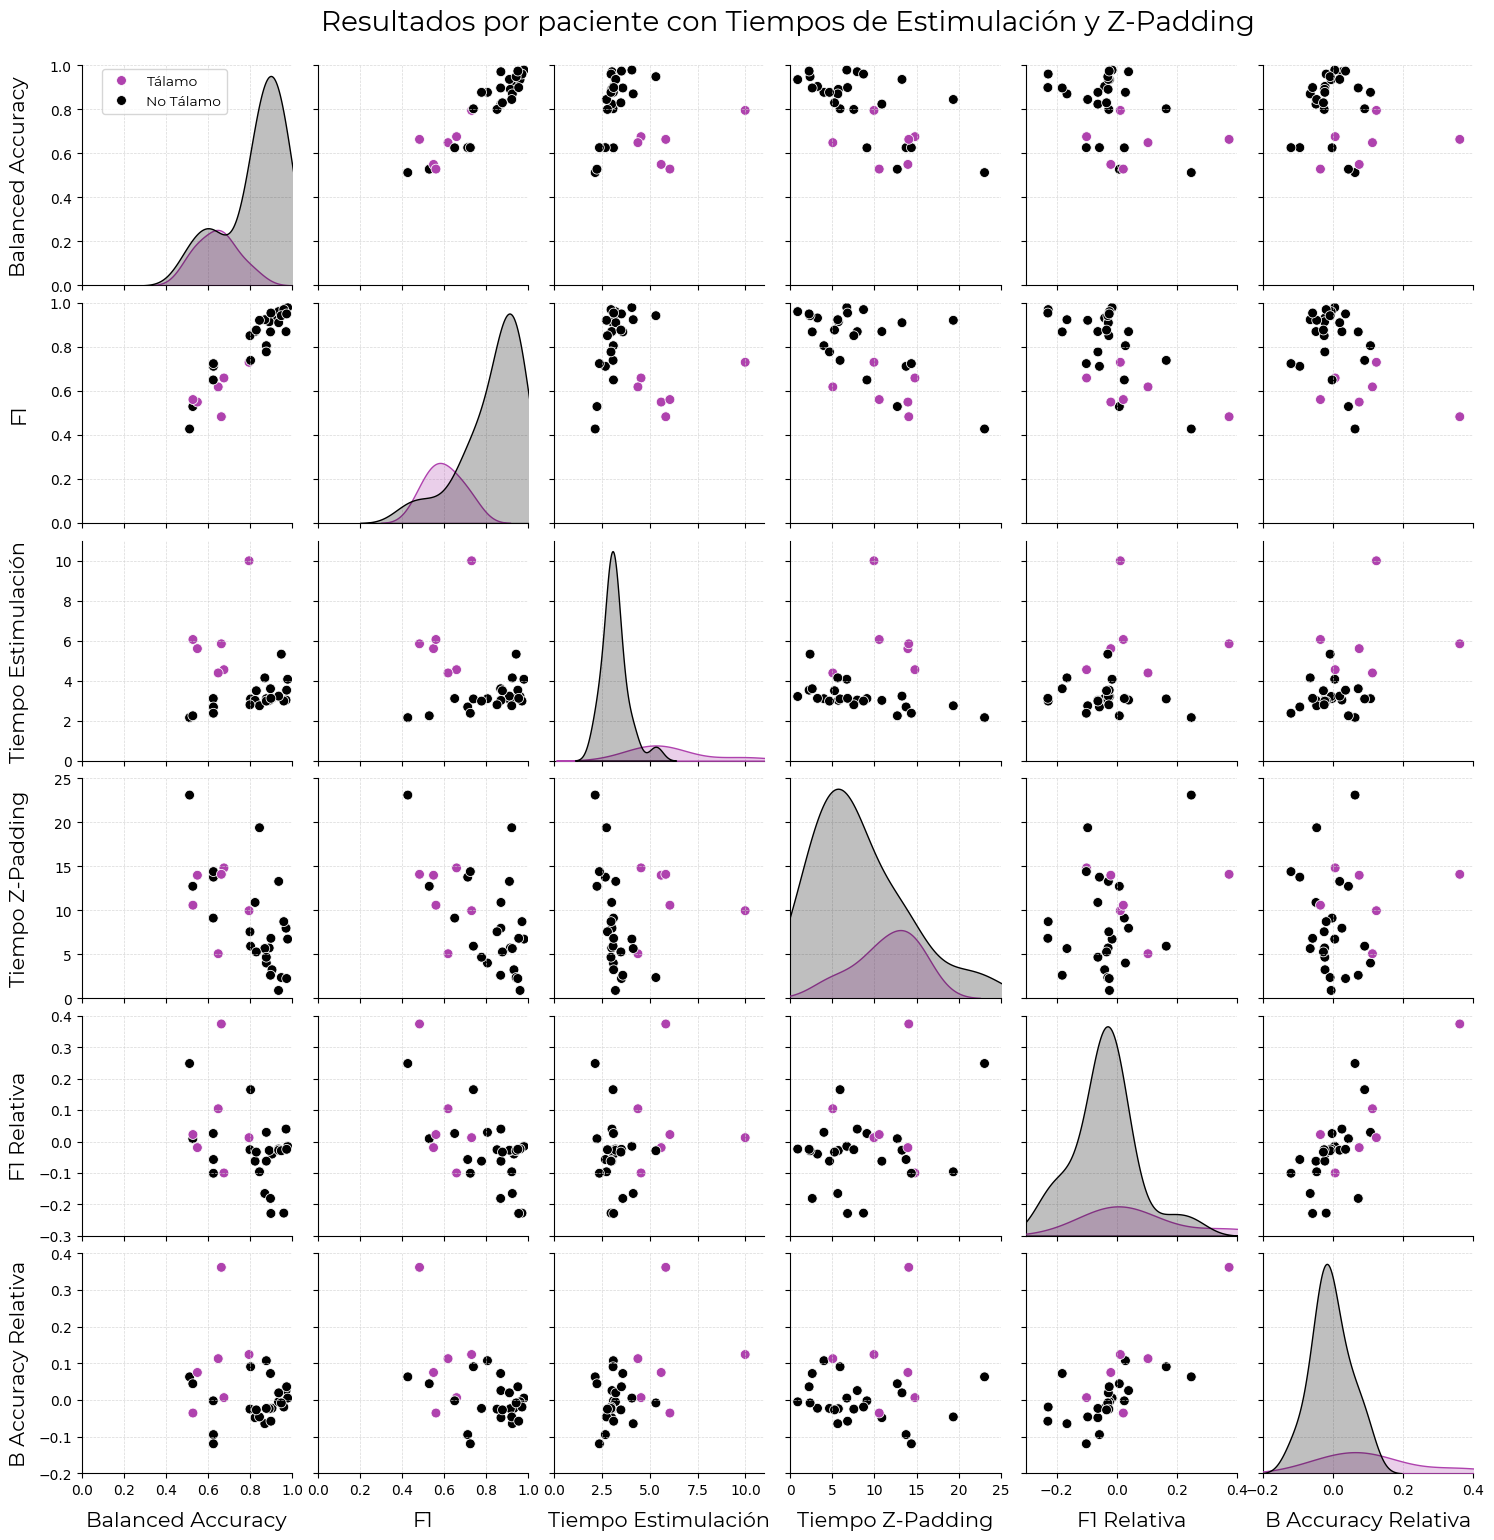

In [34]:
# Definir la fuente Montserrat
font_path = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

indices_resaltados = [28, 9, 2, 4, 18, 25]
df_resultados['Tálamo'] = df_resultados.index.isin(indices_resaltados)

# Crear el pairplot
pairplot = sns.pairplot(
                        df_resultados,
                        hue       = 'Tálamo',
                        palette   = {True: '#AF42AE', False: '#000000'}, 
                        diag_kind = "kde", 
                        plot_kws  = {'marker': 'o', 'facecolors': 'black', 'edgecolor': 'white', 's': 50},
                        diag_kws  = {'color':'#000000'}
                       )

pairplot.fig.patch.set_facecolor('#FFFFFF')  # Fondo negro fuera de los gráficos

pairplot.fig.suptitle(
                      'Resultados por paciente con Tiempos de Estimulación y Z-Padding', 
                      fontproperties = montserrat, 
                      fontsize       = 20, 
                      color          = '#000000', 
                      y              = 1.02  # Ajusta la altura del título
                     )

for ax in pairplot.axes.flatten():
    ax.set_facecolor('#FFFFFF')  # Fondo blanco en los gráficos

for ax in pairplot.fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontproperties=montserrat, fontsize=15, color='#000000',labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontproperties=montserrat, fontsize=15, color='#000000',labelpad=10)

    # Cambiar color de los ejes (spines) a blanco
    ax.spines['bottom'].set_color('#000000')
    ax.spines['top'].set_color('#000000')
    ax.spines['left'].set_color('#000000')
    ax.spines['right'].set_color('#000000')

    # Cambiar el color de los ticks (números en los ejes) a blanco
    ax.tick_params(axis='x', colors='#000000') 
    ax.tick_params(axis='y', colors='#000000') 

    ax.xaxis.label.set_color('#000000')  
    ax.yaxis.label.set_color('#000000')  

    ax.yaxis.set_label_coords(-0.25, 0.5)

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# Modificar la leyenda
legend = pairplot._legend
legend.set_frame_on(True)

legend.get_frame().set_facecolor('#FFFFFF')  
legend.set_title('', prop = montserrat)

# Personalizar los textos de la leyenda
for text in legend.get_texts():
    text.set_fontproperties(montserrat)  # Cambiar la fuente a Montserrat
    text.set_color('#000000')  # Color del texto de la leyenda

# Cambiar el color de los puntos de la leyenda
legend.legend_handles[0].set_markerfacecolor('#AF42AE')  # Talamo
legend.legend_handles[1].set_markerfacecolor('#000000')  # No Talamo

# Eliminar el texto de 'False' en la leyenda
legend.texts[0].set_text('Tálamo')  
legend.texts[1].set_text('No Tálamo')

# Ubicar la leyenda en la parte superior izquierda
legend.set_bbox_to_anchor((0.06, 0.985))  # Ajusta las coordenadas según sea necesario
legend.set_loc('upper left')

# Balanced Accuracy
pairplot.axes[0, 0].set_xlim(0, 1)
pairplot.axes[0, 0].set_ylim(0, 1)

# F1
pairplot.axes[1, 1].set_xlim(0, 1)
pairplot.axes[1, 1].set_ylim(0, 1)

# Tiempo de estimulación
pairplot.axes[2, 2].set_xlim(0, 11)
pairplot.axes[2, 2].set_ylim(0, 11)

# Z-Padding 
pairplot.axes[3, 3].set_xlim(0, 25)
pairplot.axes[3, 3].set_ylim(0, 25)

# F1 Relativa
pairplot.axes[4, 4].set_xlim(-0.3, 0.4)
pairplot.axes[4, 4].set_ylim(-0.3, 0.4)

# B Accuracy Relativa
pairplot.axes[5, 5].set_xlim(-0.2, 0.4)
pairplot.axes[5, 5].set_ylim(-0.2, 0.4)

plt.show()

## Agregar padding

In [2]:
DATA_DIR  = '/media/martin/Disco2/Rns_Data/RNS_ESPM_datatransfer/Data'

In [3]:
# lista con ids de pacientes
patients = ue.get_subfolders(DATA_DIR)

In [ ]:
short_file_per_epoch_per_patient  = []
time_stim_per_epoch_per_patient   = []
time_to_pad_per_epoch_per_patient = []
patients_list                     = []

# IDs de pacientes que quieres excluir
excluir_pacientes = ['PIT-RNS9793', 'PIT-RNS4998']

for s in range(len(patients)):
    
    rns_id_completo = patients[s]
    
    # Excluir pacientes específicos
    if rns_id_completo in excluir_pacientes:
        print(f"Omitiendo paciente {rns_id_completo}")
        continue
    
    print('Running subject ' + rns_id_completo + ' [s]: ' + str(s))
    data_files  = ue.get_data_files(DATA_DIR, patients[s], Verbose=False)
    annot_files = ue.get_annot_files(DATA_DIR, patients[s], Verbose=False)

    short_file_per_epoch  = []
    time_stim_per_epoch   = []
    time_to_pad_per_epoch = []

    for nepoch in range(len(data_files)):
        events = ue.get_events(annot_files[nepoch])
        short_file, time2pad, num_stim_samples = ue.get_padded_and_estim_time(data_files[nepoch], events)
           
        # Solo guardar los datos que no son excluidos
        short_file_per_epoch.append(short_file)
        time_stim_per_epoch.append(num_stim_samples)
        time_to_pad_per_epoch.append(np.mean(time2pad))
    
    # Guardar los resultados por paciente solo si no se omite
    short_file_per_epoch_per_patient.append(short_file_per_epoch) 
    time_stim_per_epoch_per_patient.append(time_stim_per_epoch)  
    time_to_pad_per_epoch_per_patient.append(time_to_pad_per_epoch)
    patients_list.append(patients[s])


In [7]:
data_dict = {
             'short_file_per_epoch_per_patient': short_file_per_epoch_per_patient,
             'time_stim_per_epoch_per_patient': time_stim_per_epoch_per_patient,
             'time_to_pad_per_epoch_per_patient': time_to_pad_per_epoch_per_patient,
             'patients_list': patients_list
             }

# Guardar el diccionario completo
np.save('data_lists.npy', data_dict)

## Accuracy y F1 por epoca

In [5]:
# save results

save_results_dsf_iespnet         = []
for s in range(len(patients_dsf_iespnet)):
    # define test de df_meta
    test_df  = df_meta_dsf_iespnet[df_meta_dsf_iespnet['rns_id'] == patients_dsf_iespnet[s]].copy()      
    test_df.reset_index(drop = True, inplace=True)

    test_epochs = test_df['data'].apply(lambda x: x.split("_")[2]).unique()

    save_results_dsf_iespnet_patient = []
    for epoch_counter in test_epochs:
        save_results_dsf_iespnet_patient.append(save_path_dsf_iespnet + '/' + patients_dsf_iespnet[s] + '/results/' + str(epoch_counter) +'_results.npy')

    save_results_dsf_iespnet.append(save_results_dsf_iespnet_patient)
print(save_results_dsf_iespnet)

[['/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20150804-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20150909-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20151021-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20151118-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20151215-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20160120-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20161012-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20161215-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20161215-2_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/

In [6]:
# save results

save_results_iespnet = []
for s in range(len(patients_iespnet)):
    # define test de df_meta
    test_df  = df_meta_iespnet[df_meta_iespnet['rns_id'] == patients_iespnet[s]].copy()      
    test_df.reset_index(drop = True, inplace=True)

    test_epochs = test_df['data'].apply(lambda x: x.split("_")[2]).unique()

    save_results_iespnet_patient = []
    for epoch_counter in test_epochs:
        save_results_iespnet_patient.append(save_path_iespnet + '/' + patients_iespnet[s] + '/results/' + str(epoch_counter) +'_results.npy')

    save_results_iespnet.append(save_results_iespnet_patient)
print(save_results_iespnet)

[['/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20150804-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20150909-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20151021-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20151118-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20151215-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20160120-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20161012-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20161215-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20161215-2_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/201

In [7]:
results_dsf_iespnet = []
for s in range(len(save_results_dsf_iespnet)):
    results_dsf_iespnet_patient = []
    for j in range (len(save_results_dsf_iespnet[s])):
        results_dsf_iespnet_patient.append(np.load(save_results_dsf_iespnet[s][j],allow_pickle=True).item())
    
    results_dsf_iespnet.append(results_dsf_iespnet_patient)

In [8]:
results_iespnet = []
for s in range(len(save_results_iespnet)):
    results_iespnet_patient = []
    for j in range (len(save_results_iespnet[s])):
        results_iespnet_patient.append(np.load(save_results_iespnet[s][j],allow_pickle=True).item())
    
    results_iespnet.append(results_iespnet_patient)

In [9]:
print(results_dsf_iespnet[0][0].keys())
print(results_iespnet[0][0].keys())

dict_keys(['prediction_te', 'prom_stim_time', 'stim_time'])
dict_keys(['prediction_te'])


In [10]:
prediction_te_dsf_iespnet = []
for s in range (len(results_dsf_iespnet)):
    prediction_te_dsf_iespnet_patient = []
    for j in range (len(results_dsf_iespnet[s])):
        prediction_te_dsf_iespnet_patient.append(results_dsf_iespnet[s][j].get('prediction_te'))

    prediction_te_dsf_iespnet.append(prediction_te_dsf_iespnet_patient)  

In [11]:
prediction_te_iespnet = []
for s in range (len(results_iespnet)):
    prediction_te_iespnet_patient = []
    for j in range (len(results_iespnet[s])):
        prediction_te_iespnet_patient.append(results_iespnet[s][j].get('prediction_te'))

    prediction_te_iespnet.append(prediction_te_iespnet_patient)  

In [12]:
accuracy_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    accuracy_dsf_iespnet_patient = []
    for j in range (len(prediction_te_dsf_iespnet[s])):
        accuracy_dsf_iespnet_patient.append(float(prediction_te_dsf_iespnet[s][j].get('accuracy')))
    accuracy_dsf_iespnet.append(accuracy_dsf_iespnet_patient)

f1_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    f1_dsf_iespnet_patient = []
    for j in range (len(prediction_te_dsf_iespnet[s])):
        f1_dsf_iespnet_patient.append(float(prediction_te_dsf_iespnet[s][j].get('f1')))
    f1_dsf_iespnet.append(f1_dsf_iespnet_patient)

MAE_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    MAE_dsf_iespnet_patient = []
    for j in range (len(prediction_te_dsf_iespnet[s])):
        MAE_dsf_iespnet_patient.append(prediction_te_dsf_iespnet[s][j].get('MAE_time'))
    MAE_dsf_iespnet.append(MAE_dsf_iespnet_patient)  

In [15]:
accuracy_iespnet = []
for s in range (len(prediction_te_iespnet)):
    accuracy_iespnet_patient = []
    for j in range (len(prediction_te_iespnet[s])):
        accuracy_iespnet_patient.append(float(prediction_te_iespnet[s][j].get('accuracy')))
    accuracy_iespnet.append(accuracy_iespnet_patient)

f1_iespnet = []
for s in range (len(prediction_te_iespnet)):
    f1_iespnet_patient = []
    for j in range (len(prediction_te_iespnet[s])):
        f1_iespnet_patient.append(float(prediction_te_iespnet[s][j].get('f1')))
    f1_iespnet.append(f1_iespnet_patient)

MAE_iespnet = []
for s in range (len(prediction_te_iespnet)):
    MAE_iespnet_patient = []
    for j in range (len(prediction_te_iespnet[s])):
        MAE_iespnet_patient.append(prediction_te_iespnet[s][j].get('MAE_time'))
    MAE_iespnet.append(MAE_iespnet_patient)    

In [17]:
variable_relativa_f1_=[]
variable_relativa_accuracy_=[]
for s in range(len(patients_dsf_iespnet)):
    variable_relativa_f1_.append((np.array(f1_dsf_iespnet[s])-np.array(f1_iespnet[s]))/np.array(f1_iespnet[s]))
    variable_relativa_accuracy_.append((np.array(accuracy_dsf_iespnet[s])-np.array(accuracy_iespnet[s]))/np.array(accuracy_iespnet[s]))

In [23]:
# Crear listas vacías para almacenar los datos expandidos
pacientes_expandidos                  = []
accuracy_expandidos                   = []
f1_expandidos                         = []
time_stim_expandidos                  = []
short_file_expandidos                 = []
time_to_pad_expandidos                = []
variable_relativa_f1_expandidos       = []
variable_relativa_accuracy_expandidos = []

# Iterar sobre cada paciente
for s in range(len(patients_dsf_iespnet)):
    # Obtener las listas de valores por época para el paciente actual
    accuracy_por_epoca         = accuracy_dsf_iespnet[s]
    f1_por_epoca               = f1_iespnet[s]
    time_stim_por_epoca        = time_stim_per_epoch_per_patient[s]
    short_file_por_epoca       = short_file_per_epoch_per_patient[s]
    time_to_pad_por_epoca      = time_to_pad_per_epoch_per_patient[s]
    variable_relativa_f1       = variable_relativa_f1_[s]
    variable_relativa_accuracy = variable_relativa_accuracy_[s]
    
    # Repetir el nombre del paciente tantas veces como épocas tenga
    pacientes_expandidos.extend([patients_dsf_iespnet[s]] * len(accuracy_por_epoca))
    
    # Agregar los valores de accuracy, f1 y las otras variables correspondientes
    accuracy_expandidos.extend(accuracy_por_epoca)
    f1_expandidos.extend(f1_por_epoca)
    time_stim_expandidos.extend(time_stim_por_epoca)
    short_file_expandidos.extend(short_file_por_epoca)
    time_to_pad_expandidos.extend(time_to_pad_por_epoca)
    variable_relativa_f1_expandidos.extend(variable_relativa_f1)
    variable_relativa_accuracy_expandidos.extend(variable_relativa_accuracy)

# Crear el DataFrame final con los datos expandidos
df_resultados_per_epoch = pd.DataFrame({
                                        'Pacientes'             : pacientes_expandidos,
                                        'Balanced Accuracy'     : accuracy_expandidos,
                                        'F1'                    : f1_expandidos,
                                        'Tiempo Estimulación'   : time_stim_expandidos,
                                        #'Short_file_por_epoca' : short_file_expandidos,
                                        'Tiempo Z-Padding'      : time_to_pad_expandidos,
                                        'F1 Relativa'           : variable_relativa_f1_expandidos,
                                        'B Accuracy Relativa'   : variable_relativa_accuracy_expandidos
                                       })

# Mostrar el DataFrame
df_resultados_per_epoch

,Pacientes,Balanced Accuracy,F1,Tiempo Estimulación,Tiempo Z-Padding,F1 Relativa,B Accuracy Relativa
0,PIT-RNS1603,0.958333,1.000000,NaN,5.528000,-0.510638,-0.041667
1,PIT-RNS1603,0.487654,0.854895,NaN,NaN,-0.429574,-0.349794
2,PIT-RNS1603,0.806034,0.850961,2.349107,14.040000,-0.171461,0.074713
3,PIT-RNS1603,0.630769,0.574443,2.369910,NaN,0.010672,0.037975
4,PIT-RNS1603,0.801020,0.702885,2.378478,22.881333,-0.065338,-0.087209
...,...,...,...,...,...,...,...
234,PIT-RNS8076,0.951220,1.000000,3.198667,NaN,-0.184100,-0.048780
235,PIT-RNS8076,0.959716,0.872630,4.251581,NaN,-0.157993,0.099796
236,PIT-RNS8076,0.948276,1.000000,2.048000,NaN,-0.286872,-0.051724
237,PIT-RNS8076,0.939024,1.000000,2.594778,27.508000,-0.166065,-0.060976


In [39]:
print(df_resultados_per_epoch['Balanced Accuracy'].min())
print(df_resultados_per_epoch['Balanced Accuracy'].max())

0.4583333333333333
1.0


In [40]:
print(df_resultados_per_epoch['F1'].min())
print(df_resultados_per_epoch['F1'].max())

0.34779351116417057
0.9999999500000026


In [44]:
print(df_resultados_per_epoch['Tiempo Estimulación'].min())
print(df_resultados_per_epoch['Tiempo Estimulación'].max())

0.0
12.436151515151515


In [45]:
print(df_resultados_per_epoch['Tiempo Z-Padding'].min())
print(df_resultados_per_epoch['Tiempo Z-Padding'].max())

0.0
29.781803636363634


In [46]:
print(df_resultados_per_epoch['F1 Relativa'].min())
print(df_resultados_per_epoch['F1 Relativa'].max())

-0.5652174187145527
1.4004260104000255


In [35]:
df_resultados_per_epoch['B Accuracy Relativa'].min()

np.float64(-0.5412371134020619)

In [37]:
df_resultados_per_epoch['B Accuracy Relativa'].max()

np.float64(1.0)

In [24]:
df_resultados_per_epoch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pacientes            239 non-null    object 
 1   Balanced Accuracy    239 non-null    float64
 2   F1                   239 non-null    float64
 3   Tiempo Estimulación  231 non-null    float64
 4   Tiempo Z-Padding     180 non-null    float64
 5   F1 Relativa          239 non-null    float64
 6   B Accuracy Relativa  239 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.2+ KB


In [25]:
# Reemplazar los NaN por 0 en todo el DataFrame
df_resultados_per_epoch.fillna(0, inplace=True)

In [26]:
df_resultados_per_epoch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pacientes            239 non-null    object 
 1   Balanced Accuracy    239 non-null    float64
 2   F1                   239 non-null    float64
 3   Tiempo Estimulación  239 non-null    float64
 4   Tiempo Z-Padding     239 non-null    float64
 5   F1 Relativa          239 non-null    float64
 6   B Accuracy Relativa  239 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.2+ KB


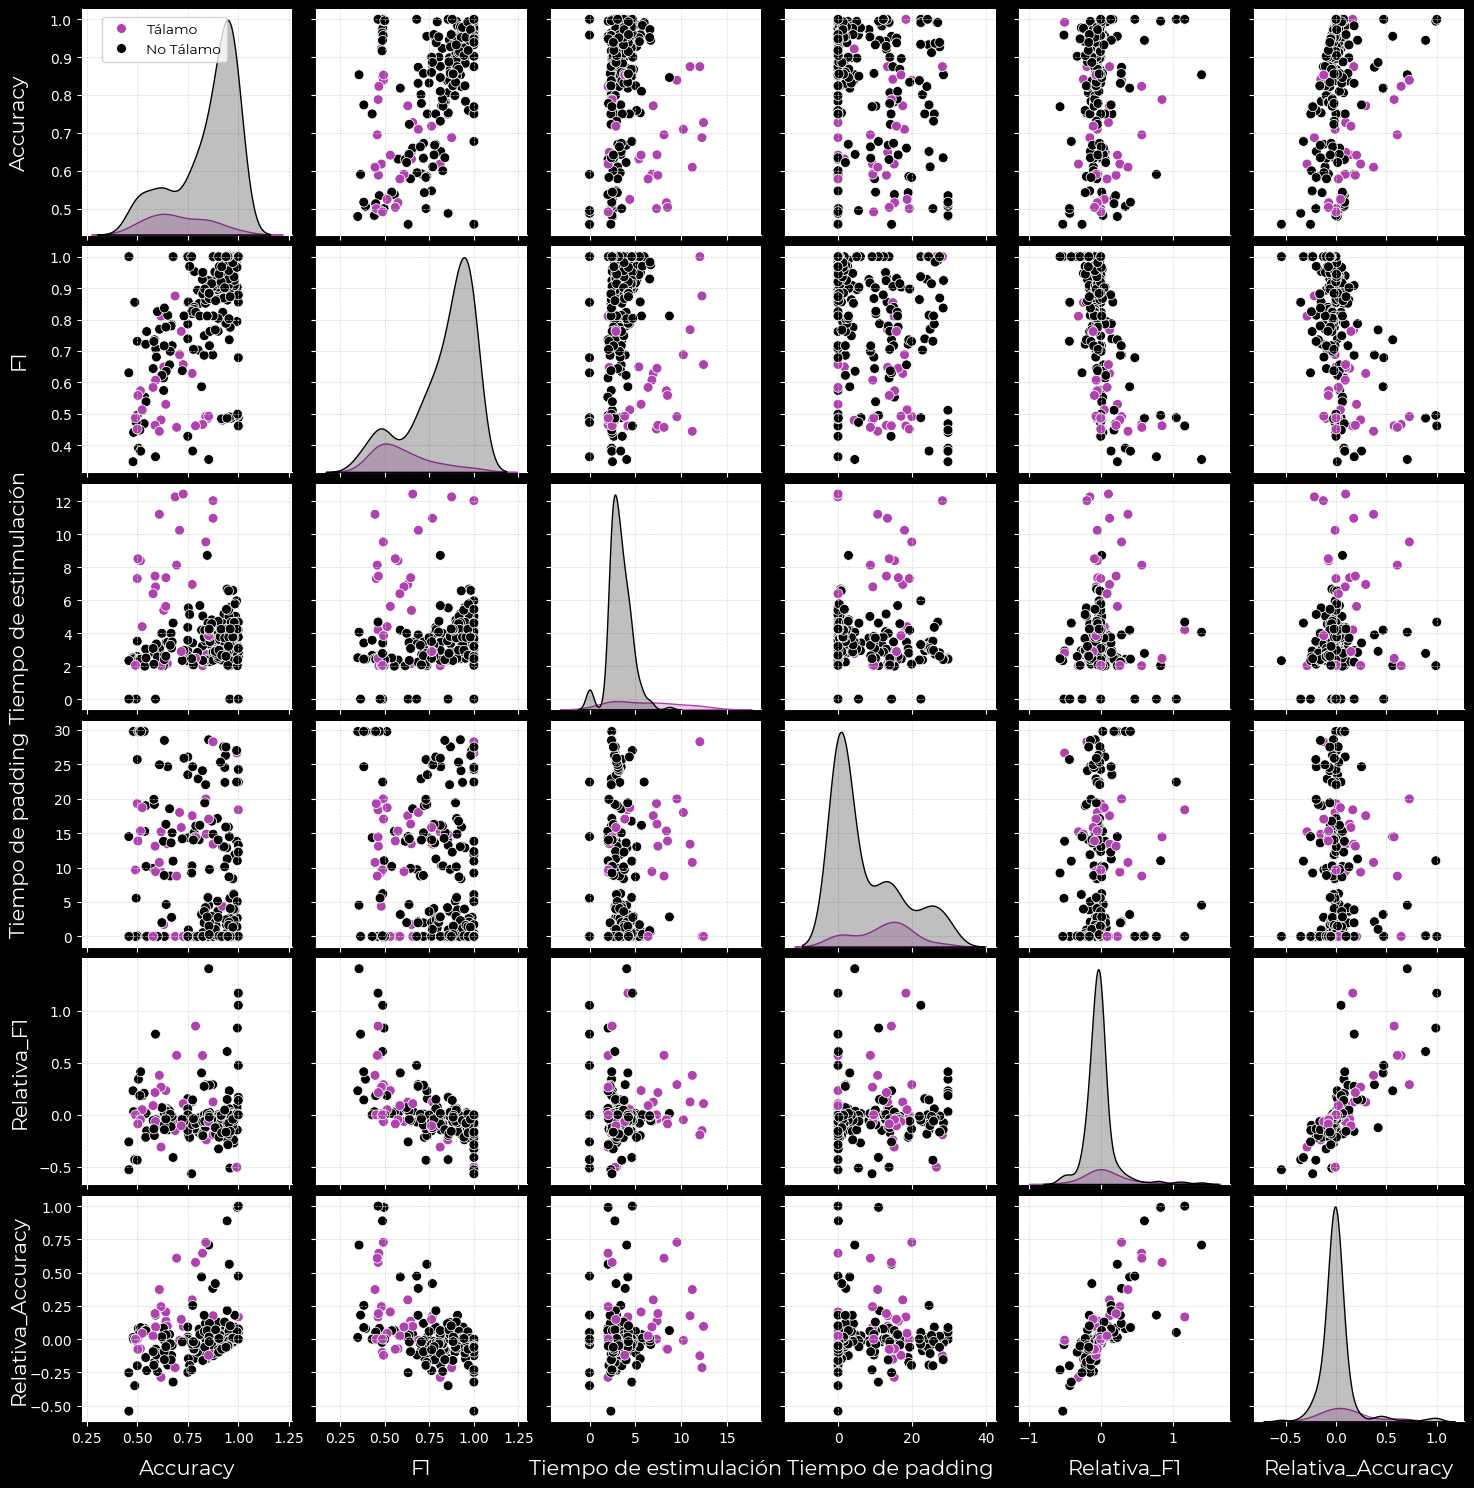

In [68]:
font_path = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

pacientes_talamo = ['PIT-RNS0427', 'PIT-RNS1713', 'PIT-RNS3016', 'PIT-RNS7168', 'PIT-RNS8326', 'PIT-RNS6762']

df_resultados_per_epoch['Tálamo'] = df_resultados_per_epoch['Paciente'].apply(lambda x: x in pacientes_talamo)

# Crear el pairplot
pairplot = sns.pairplot(
                        df_resultados_per_epoch,
                        hue       = 'Talamo',
                        palette   = {True: '#AF42AE', False: '#000000'}, 
                        diag_kind = "kde", 
                        plot_kws  = {'marker': 'o', 'facecolors': 'black', 'edgecolor': 'white', 's': 50},
                        diag_kws  = {'color':'#000000'}
                       )

pairplot.fig.patch.set_facecolor('#000000')  # Fondo negro fuera de los gráficos

for ax in pairplot.axes.flatten():
    ax.set_facecolor('#FFFFFF')  # Fondo blanco en los gráficos

for ax in pairplot.fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontproperties=montserrat, fontsize=15, color='#FFFFFF',labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontproperties=montserrat, fontsize=15, color='#FFFFFF',labelpad=10)

    ax.spines['bottom'].set_color('#FFFFFF')
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['left'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')

    # Cambiar el color de los ticks (números en los ejes) a blanco
    ax.tick_params(axis='x', colors='#FFFFFF')  
    ax.tick_params(axis='y', colors='#FFFFFF')  

    ax.xaxis.label.set_color('#FFFFFF')  
    ax.yaxis.label.set_color('#FFFFFF')  

    ax.yaxis.set_label_coords(-0.25, 0.5)

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')


legend = pairplot._legend
legend.set_frame_on(True)

legend.get_frame().set_facecolor('#FFFFFF')  
legend.set_title('', prop = montserrat)

# Personalizar los textos de la leyenda
for text in legend.get_texts():
    text.set_fontproperties(montserrat)  
    text.set_color('#000000') 

# Cambiar el color de los puntos de la leyenda
legend.legend_handles[0].set_markerfacecolor('#AF42AE')  # Talamo
legend.legend_handles[1].set_markerfacecolor('#000000')  # No Talamo


legend.texts[0].set_text('Tálamo')  
legend.texts[1].set_text('No Tálamo')

# Ubicar la leyenda en la parte superior izquierda
legend.set_bbox_to_anchor((0.06, 0.985))  
legend.set_loc('upper left')  

plt.show()

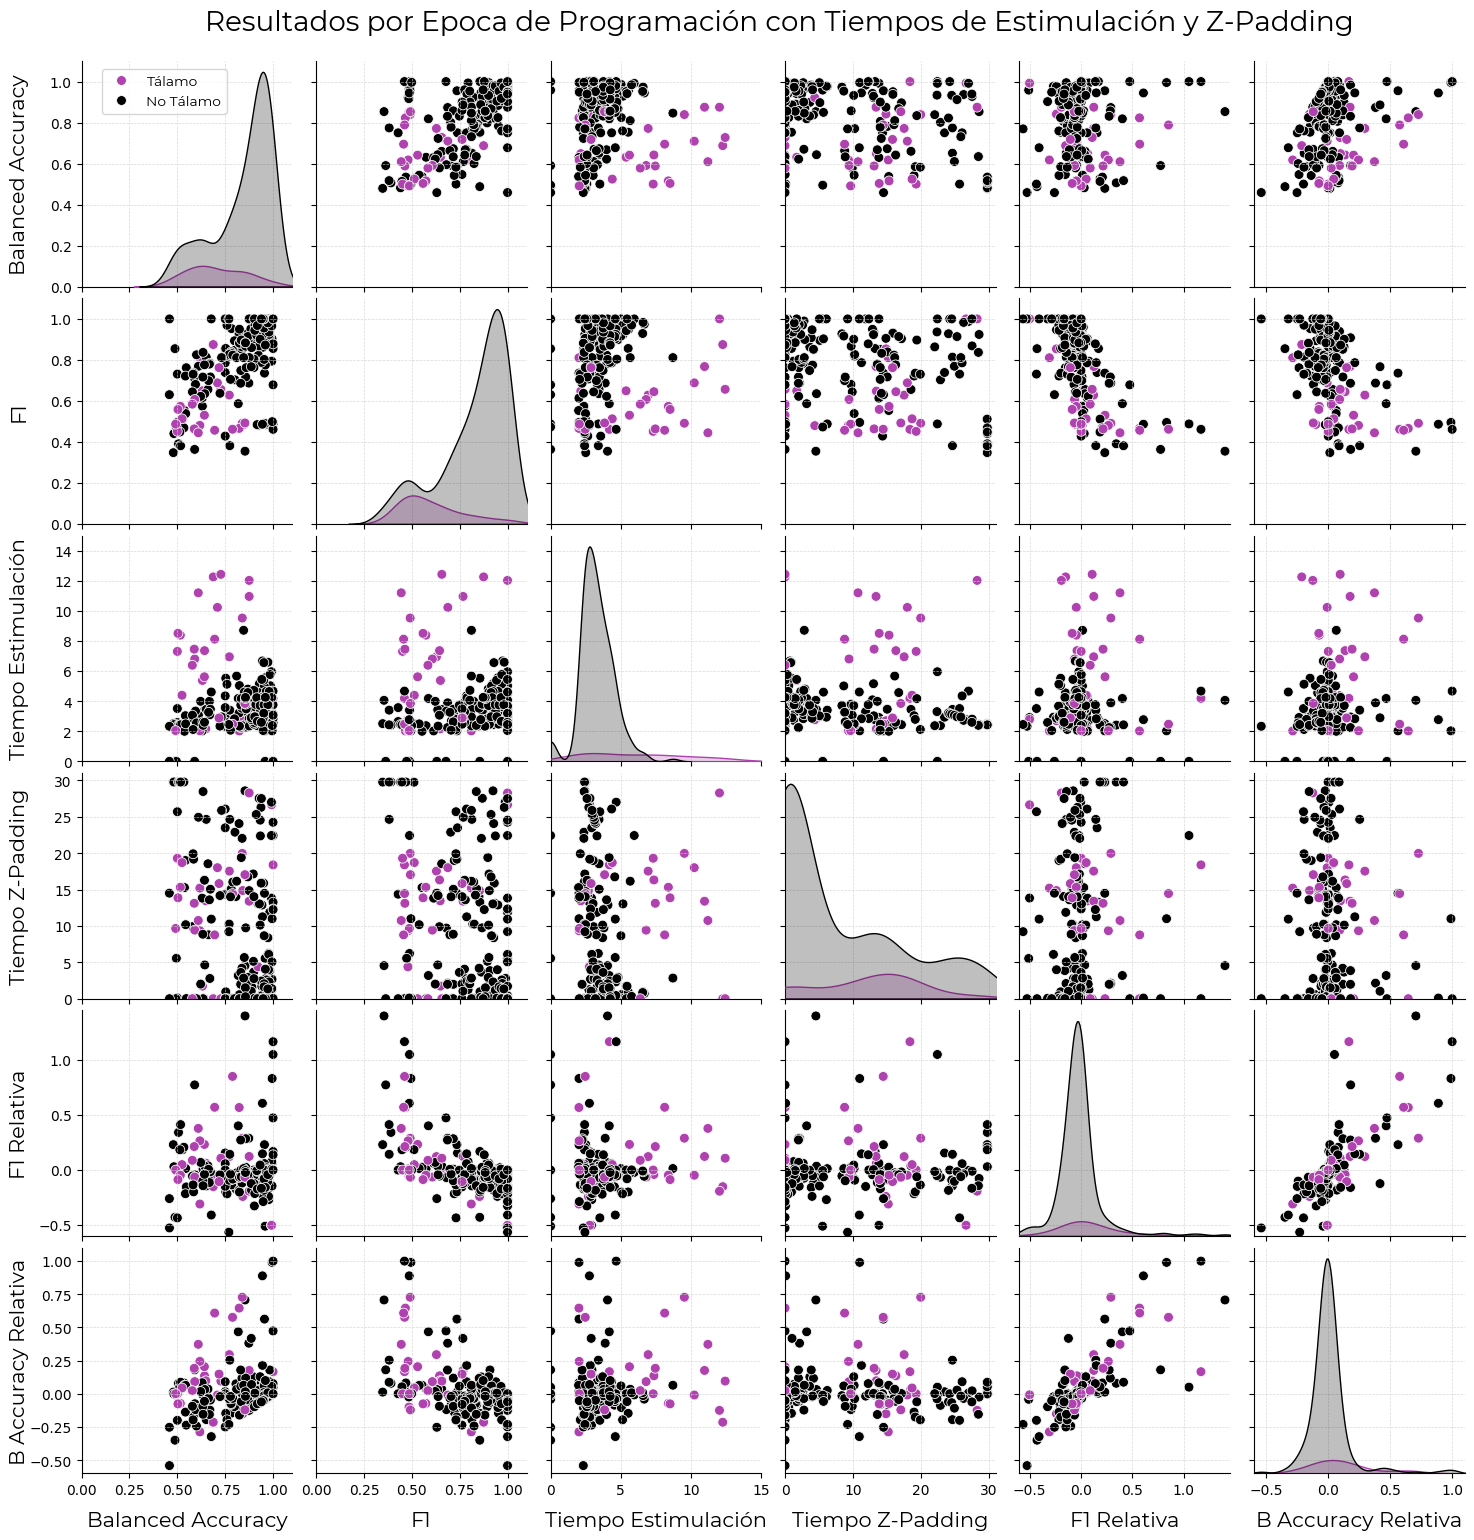

In [48]:
# Definir la fuente Montserrat
font_path = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

pacientes_talamo                  = ['PIT-RNS0427', 'PIT-RNS1713', 'PIT-RNS3016', 'PIT-RNS7168', 'PIT-RNS8326', 'PIT-RNS6762']
df_resultados_per_epoch['Tálamo'] = df_resultados_per_epoch['Pacientes'].apply(lambda x: x in pacientes_talamo)

# Crear el pairplot
pairplot = sns.pairplot(
                        df_resultados_per_epoch,
                        hue       = 'Tálamo',
                        palette   = {True: '#AF42AE', False: '#000000'}, 
                        diag_kind = "kde", 
                        plot_kws  = {'marker': 'o', 'facecolors': 'black', 'edgecolor': 'white', 's': 50},
                        diag_kws  = {'color':'#000000'}
                       )

pairplot.fig.patch.set_facecolor('#FFFFFF')  # Fondo negro fuera de los gráficos

pairplot.fig.suptitle(
                      'Resultados por Epoca de Programación con Tiempos de Estimulación y Z-Padding', 
                      fontproperties = montserrat, 
                      fontsize       = 20, 
                      color          = '#000000', 
                      y              = 1.02  # Ajusta la altura del título
                     )

for ax in pairplot.axes.flatten():
    ax.set_facecolor('#FFFFFF')  # Fondo blanco en los gráficos

for ax in pairplot.fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontproperties=montserrat, fontsize=15, color='#000000',labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontproperties=montserrat, fontsize=15, color='#000000',labelpad=10)

    # Cambiar color de los ejes (spines) a blanco
    ax.spines['bottom'].set_color('#000000')
    ax.spines['top'].set_color('#000000')
    ax.spines['left'].set_color('#000000')
    ax.spines['right'].set_color('#000000')

    # Cambiar el color de los ticks (números en los ejes) a blanco
    ax.tick_params(axis='x', colors='#000000') 
    ax.tick_params(axis='y', colors='#000000') 

    ax.xaxis.label.set_color('#000000')  
    ax.yaxis.label.set_color('#000000')  

    ax.yaxis.set_label_coords(-0.25, 0.5)

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# Modificar la leyenda
legend = pairplot._legend
legend.set_frame_on(True)

legend.get_frame().set_facecolor('#FFFFFF')  
legend.set_title('', prop = montserrat)

# Personalizar los textos de la leyenda
for text in legend.get_texts():
    text.set_fontproperties(montserrat)  # Cambiar la fuente a Montserrat
    text.set_color('#000000')  # Color del texto de la leyenda

# Cambiar el color de los puntos de la leyenda
legend.legend_handles[0].set_markerfacecolor('#AF42AE')  # Talamo
legend.legend_handles[1].set_markerfacecolor('#000000')  # No Talamo

# Eliminar el texto de 'False' en la leyenda
legend.texts[0].set_text('Tálamo')  
legend.texts[1].set_text('No Tálamo')

# Ubicar la leyenda en la parte superior izquierda
legend.set_bbox_to_anchor((0.06, 0.985))  # Ajusta las coordenadas según sea necesario
legend.set_loc('upper left')

# Balanced Accuracy
pairplot.axes[0, 0].set_xlim(0, 1.1)
pairplot.axes[0, 0].set_ylim(0, 1.1)

# F1
pairplot.axes[1, 1].set_xlim(0, 1.1)
pairplot.axes[1, 1].set_ylim(0, 1.1)

# Tiempo de estimulación
pairplot.axes[2, 2].set_xlim(0, 15)
pairplot.axes[2, 2].set_ylim(0, 15)

# Z-Padding 
pairplot.axes[3, 3].set_xlim(0, 31)
pairplot.axes[3, 3].set_ylim(0, 31)

# F1 Relativa
pairplot.axes[4, 4].set_xlim(-0.6, 1.45)
pairplot.axes[4, 4].set_ylim(-0.6, 1.45)

# B Accuracy Relativa
pairplot.axes[5, 5].set_xlim(-0.6, 1.1)
pairplot.axes[5, 5].set_ylim(-0.6, 1.1)

plt.show()